In [1]:
# Dependencies
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
filepath = 'hate_crime.csv'
df = pd.read_csv(filepath, low_memory=False)
df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [3]:
filtered_df = df[['DATA_YEAR', 'STATE_ABBR', 'OFFENDER_RACE', 'VICTIM_TYPES', 'BIAS_DESC', 
                  'VICTIM_COUNT', 'TOTAL_OFFENDER_COUNT']]
filtered_df.head()

,DATA_YEAR,STATE_ABBR,OFFENDER_RACE,VICTIM_TYPES,BIAS_DESC,VICTIM_COUNT,TOTAL_OFFENDER_COUNT
0,1991,AR,White,Individual,Anti-Black or African American,1,1
1,1991,AR,Black or African American,Individual,Anti-White,1,1
2,1991,AR,Black or African American,Individual,Anti-Black or African American,1,1
3,1991,AR,Black or African American,Individual,Anti-White,2,1
4,1991,AR,Black or African American,Individual,Anti-White,1,1


In [4]:
years_df = filtered_df[(filtered_df['DATA_YEAR'] >= 2014) & (df['DATA_YEAR'] <= 2018)]
years_df

,DATA_YEAR,STATE_ABBR,OFFENDER_RACE,VICTIM_TYPES,BIAS_DESC,VICTIM_COUNT,TOTAL_OFFENDER_COUNT
169146,2014,AK,Unknown,Individual,Anti-Gay (Male),2,0
169147,2014,AK,White,Individual,Anti-American Indian or Alaska Native,1,2
169148,2014,AK,White,Individual,Anti-Black or African American,1,1
169149,2014,AK,Black or African American,Individual,Anti-American Indian or Alaska Native,2,2
169150,2014,AK,White,Individual,Anti-American Indian or Alaska Native,1,2
...,...,...,...,...,...,...,...
201398,2018,WV,Unknown,Individual,Anti-Black or African American,1,0
201399,2018,WV,White,Individual,Anti-Black or African American,1,1
201400,2018,WV,Unknown,Individual,Anti-Asian,1,0
201401,2018,WV,White,Law Enforcement Officer,Anti-White,1,1


In [10]:
victims = years_df['VICTIM_COUNT'].value_counts()
victims = pd.DataFrame(victims).sort_index().rename(columns={'VICTIM_COUNT':'Total'})

count14 = years_df.loc[years_df['DATA_YEAR'] == 2014,:]['VICTIM_COUNT'].value_counts()
count14_df = pd.DataFrame(count14).sort_index().rename(columns={'VICTIM_COUNT':'2014'})

count15 = years_df.loc[years_df['DATA_YEAR'] == 2015,:]['VICTIM_COUNT'].value_counts()
count15_df = pd.DataFrame(count15).sort_index().rename(columns={'VICTIM_COUNT':'2015'})

count16 = years_df.loc[years_df['DATA_YEAR'] == 2016,:]['VICTIM_COUNT'].value_counts()
count16_df = pd.DataFrame(count16).sort_index().rename(columns={'VICTIM_COUNT':'2016'})

count17 = years_df.loc[years_df['DATA_YEAR'] == 2017,:]['VICTIM_COUNT'].value_counts()
count17_df = pd.DataFrame(count17).sort_index().rename(columns={'VICTIM_COUNT':'2017'})

count18 = years_df.loc[years_df['DATA_YEAR'] == 2018,:]['VICTIM_COUNT'].value_counts()
count18_df = pd.DataFrame(count18).sort_index().rename(columns={'VICTIM_COUNT':'2018'})

count_updtd = pd.concat([victims, count14_df, count15_df, count16_df, count17_df, count18_df], axis=1)
count_df = count_updtd.dropna().reset_index().rename(columns={
    'index':'Victim #s'}).sort_values(by=['Victim #s'], ascending=True).head(3)
count_df

,Victim #s,Total,2014,2015,2016,2017,2018
0,1,27626,4775.0,4979.0,5409.0,6345.0,6118.0
1,2,3453,599.0,690.0,618.0,725.0,821.0
2,3,658,133.0,124.0,124.0,146.0,131.0


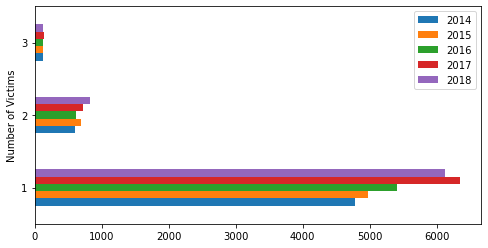

In [30]:
multi_plot = count_df[['2014', '2015', '2016', '2017', '2018']].plot(kind = 'barh', figsize = (8,4))
multi_plot.set_yticklabels(count_df['Victim #s'], rotation = 0)
plt.ylabel('Number of Victims')
plt.show()

In [17]:
per_change1 = (((count_df['2015']) - (count_df['2014'])) / (count_df['2014'])).round(3)
per_change2 = (((count_df['2016']) - (count_df['2015'])) / (count_df['2015'])).round(3)
per_change3 = (((count_df['2017']) - (count_df['2016'])) / (count_df['2016'])).round(3)
per_change4 = (((count_df['2018']) - (count_df['2017'])) / (count_df['2017'])).round(3)

off_change = {
    "% chg 14 to 15":per_change1,
    "% chg 15 to 16":per_change2,
    "% chg 16 to 17":per_change3,
    "% chg 17 to 18":per_change4
}
off_change = pd.DataFrame(off_change, columns=off_change.keys())
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color
count_chart = off_change.set_index((count_df['Victim #s'])).style.format('{:.2%}').applymap(color_negative_red)
count_chart

,% chg 14 to 15,% chg 15 to 16,% chg 16 to 17,% chg 17 to 18
Victim #s,,,,
1,4.30%,8.60%,17.30%,-3.60%
2,15.20%,-10.40%,17.30%,13.20%
3,-6.80%,0.00%,17.70%,-10.30%


In [19]:
offenders = years_df['TOTAL_OFFENDER_COUNT'].value_counts()
offenders = pd.DataFrame(offenders).sort_index().rename(columns={'TOTAL_OFFENDER_COUNT':'Total'})

offender14 = years_df.loc[years_df['DATA_YEAR'] == 2014,:]['TOTAL_OFFENDER_COUNT'].value_counts()
offender14_df = pd.DataFrame(offender14).sort_index().rename(columns={'TOTAL_OFFENDER_COUNT':'2014'})

offender15 = years_df.loc[years_df['DATA_YEAR'] == 2015,:]['TOTAL_OFFENDER_COUNT'].value_counts()
offender15_df = pd.DataFrame(offender15).sort_index().rename(columns={'TOTAL_OFFENDER_COUNT':'2015'})

offender16 = years_df.loc[years_df['DATA_YEAR'] == 2016,:]['TOTAL_OFFENDER_COUNT'].value_counts()
offender16_df = pd.DataFrame(offender16).sort_index().rename(columns={'TOTAL_OFFENDER_COUNT':'2016'})

offender17 = years_df.loc[years_df['DATA_YEAR'] == 2017,:]['TOTAL_OFFENDER_COUNT'].value_counts()
offender17_df = pd.DataFrame(offender17).sort_index().rename(columns={'TOTAL_OFFENDER_COUNT':'2017'})

offender18 = years_df.loc[years_df['DATA_YEAR'] == 2018,:]['TOTAL_OFFENDER_COUNT'].value_counts()
offender18_df = pd.DataFrame(offender18).sort_index().rename(columns={'TOTAL_OFFENDER_COUNT':'2018'})

off_updtd = pd.concat([offenders, offender14_df, offender15_df, offender16_df, offender17_df, offender18_df], axis=1)
offender_df = off_updtd.dropna().reset_index().rename(columns={
    'index': 'Offender #s'}).sort_values(by=['Offender #s'], ascending=True).head()
offender_df

,Offender #s,Total,2014,2015,2016,2017,2018
0,0,9744,1617.0,1663.0,1816.0,2555.0,2093.0
1,1,18658,3244.0,3481.0,3651.0,3923.0,4359.0
2,2,2423,440.0,466.0,469.0,552.0,496.0
3,3,807,175.0,143.0,180.0,171.0,138.0
4,4,348,70.0,74.0,83.0,63.0,58.0


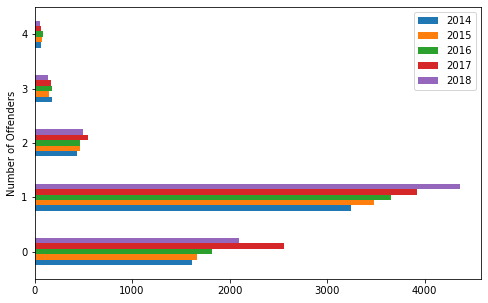

In [28]:
multi_plot = offender_df[['2014', '2015', '2016', '2017', '2018']].plot(kind = 'barh', figsize = (8,5))
multi_plot.set_yticklabels(offender_df['Offender #s'], rotation = 0)
plt.ylabel('Number of Offenders')
plt.show()

In [22]:
per_change1 = (((offender_df['2015']) - (offender_df['2014'])) / (offender_df['2014'])).round(3)
per_change2 = (((offender_df['2016']) - (offender_df['2015'])) / (offender_df['2015'])).round(3)
per_change3 = (((offender_df['2017']) - (offender_df['2016'])) / (offender_df['2016'])).round(3)
per_change4 = (((offender_df['2018']) - (offender_df['2017'])) / (offender_df['2017'])).round(3)

off_change = {
    "% chg 14 to 15":per_change1,
    "% chg 15 to 16":per_change2,
    "% chg 16 to 17":per_change3,
    "% chg 17 to 18":per_change4
}
off_change = pd.DataFrame(off_change, columns=off_change.keys())
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color
offender_chart = off_change.set_index((offender_df['Offender #s'])).style.format('{:.2%}').applymap(color_negative_red)
offender_chart

,% chg 14 to 15,% chg 15 to 16,% chg 16 to 17,% chg 17 to 18
Offender #s,,,,
0,2.80%,9.20%,40.70%,-18.10%
1,7.30%,4.90%,7.50%,11.10%
2,5.90%,0.60%,17.70%,-10.10%
3,-18.30%,25.90%,-5.00%,-19.30%
4,5.70%,12.20%,-24.10%,-7.90%


In [25]:
off_race = years_df['OFFENDER_RACE'].value_counts()
off_race = pd.DataFrame(off_race).sort_index().rename(columns={'OFFENDER_RACE':'Total'})

offrace14 = years_df.loc[years_df['DATA_YEAR'] == 2014,:]['OFFENDER_RACE'].value_counts()
offrace14_df = pd.DataFrame(offrace14).sort_index().rename(columns={'OFFENDER_RACE':'2014'})

offrace15 = years_df.loc[years_df['DATA_YEAR'] == 2015,:]['OFFENDER_RACE'].value_counts()
offrace15_df = pd.DataFrame(offrace15).sort_index().rename(columns={'OFFENDER_RACE':'2015'})

offrace16 = years_df.loc[years_df['DATA_YEAR'] == 2016,:]['OFFENDER_RACE'].value_counts()
offrace16_df = pd.DataFrame(offrace16).sort_index().rename(columns={'OFFENDER_RACE':'2016'})

offrace17 = years_df.loc[years_df['DATA_YEAR'] == 2017,:]['OFFENDER_RACE'].value_counts()
offrace17_df = pd.DataFrame(offrace17).sort_index().rename(columns={'OFFENDER_RACE':'2017'})

offrace18 = years_df.loc[years_df['DATA_YEAR'] == 2018,:]['OFFENDER_RACE'].value_counts()
offrace18_df = pd.DataFrame(offrace18).sort_index().rename(columns={'OFFENDER_RACE':'2018'})

offrace_df = pd.concat([off_race, offrace14_df, offrace15_df, offrace16_df, offrace17_df, offrace18_df], axis=1)
off_race_df = offrace_df.reset_index().rename(columns={'index':'Offender Race'}).sort_values(by=[
    'Total'], ascending=False).reset_index(drop=True).head()
off_race_df

,Offender Race,Total,2014,2015,2016,2017,2018
0,Unknown,13487,2335,2413,2715,3269,2755
1,White,12170,2185,2199,2197,2698,2891
2,Black or African American,5128,851,960,1089,1051,1177
3,Multiple,957,145,209,180,208,215
4,Asian,236,37,48,38,40,73


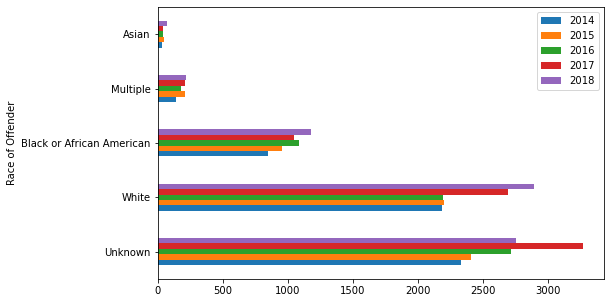

In [27]:
multi_plot = off_race_df[['2014', '2015', '2016', '2017', '2018']].plot(kind = 'barh', figsize = (8,5))
multi_plot.set_yticklabels(off_race_df['Offender Race'], rotation = 0)
plt.ylabel('Race of Offender')
plt.show()

In [ ]:
chg_per1 = (((off_race_df['2015']) - (off_race_df['2014'])) / (off_race_df['2014'])).round(3)
chg_per2 = (((off_race_df['2016']) - (off_race_df['2015'])) / (off_race_df['2015'])).round(3)
chg_per3 = (((off_race_df['2017']) - (off_race_df['2016'])) / (off_race_df['2016'])).round(3)
chg_per4 = (((off_race_df['2018']) - (off_race_df['2017'])) / (off_race_df['2017'])).round(3)

off_race_chg = {
    "% chg 14 to 15":chg_per1,
    "% chg 15 to 16":chg_per2,
    "% chg 16 to 17":chg_per3,
    "% chg 17 to 18":chg_per4
}
off_race_chg = pd.DataFrame(off_race_chg, columns=off_race_chg.keys())
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color
off_race_chart = off_race_chg.set_index((off_race_df['Offender Race'])).style.format('{:.2%}').applymap(color_negative_red)
off_race_chart